<a href="https://colab.research.google.com/github/ctalamilla/regresion-metricas-UDA/blob/main/TP07_CSALINAS_tf_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

# **Trabajo Final - Módulo 7 - Aprendizaje Automático - Machine Learning - Regresión**

![logo](https://www.python.org/static/community_logos/python-powered-w-100x40.png)

~~~
Cristian Patricio Salinas Talamilla
~~~

# **Aclaraciones previas**



*   En cada celda se indica lo solicitado.
*   Se pueden generar la cantidad de scripts necesarios.
*   Puede explicar insertando celdas de texto.
*   Para graficar se puede utilizar cualquier librería.
*   Al finalizar, descargar el archivo y entregarlo por el campus.
*   Al finalizar se debería borrar esta celda.


**En virtud del DataFrame propuesto, generar un modelo de regresión para predecir el precio de viviendas de Argentina:**

- **l1** - país
- **l2** - provincia o ciudad
- **l3** - barrio
- **rooms** - cantidad de habitaciones
- **bedrooms** - cantidad de dormitorios
- **bathrooms** - cantidad de baños
- **surface_total** - superficie total
- **surface_covered** - superficie cubierta
- **price** - precio

# **Carga de módulos y datos necesarios**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# **Creación del DataFrame**

In [ ]:
url="https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/"
archivo="propiedades.csv"
regresion = pd.read_csv(url+archivo, index_col=0)

In [ ]:
regresion.head()

,id,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,0,Argentina,Capital Federal,Palermo,2.00,1.00,1.00,80.00,NaN,235000
1,1,Argentina,Capital Federal,Belgrano,NaN,NaN,1.00,NaN,40.00,105000
2,2,Argentina,Capital Federal,San Telmo,1.00,NaN,1.00,34.00,31.00,109183
3,3,Argentina,Capital Federal,Villa Urquiza,2.00,NaN,1.00,NaN,51.00,110000
4,4,Argentina,Capital Federal,Belgrano,6.00,4.00,2.00,190.00,178.00,550000


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
regresion = regresion.drop(['id','l1', 'l2'], axis=1)
regresion

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Palermo,2.00,1.00,1.00,80.00,NaN,235000
1,Belgrano,NaN,NaN,1.00,NaN,40.00,105000
2,San Telmo,1.00,NaN,1.00,34.00,31.00,109183
3,Villa Urquiza,2.00,NaN,1.00,NaN,51.00,110000
4,Belgrano,6.00,4.00,2.00,190.00,178.00,550000
...,...,...,...,...,...,...,...
44673,Monte Castro,2.00,1.00,1.00,56.00,54.00,115000
44674,Barrio Norte,2.00,1.00,1.00,NaN,NaN,105000
44675,Colegiales,2.00,1.00,1.00,45.00,40.00,99000
44676,Colegiales,1.00,1.00,1.00,59.00,59.00,105000


In [ ]:
regresion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44678 entries, 0 to 44677
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   l3               44382 non-null  object 
 1   rooms            43547 non-null  float64
 2   bedrooms         38623 non-null  float64
 3   bathrooms        43371 non-null  float64
 4   surface_total    39856 non-null  float64
 5   surface_covered  40641 non-null  float64
 6   price            44678 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


In [ ]:
# Seleccionando las columnas numéricas
numeric_cols = regresion.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
numeric_cols

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price'],
      dtype='object')

In [ ]:
regresion[numeric_cols].describe(percentiles=[.01,.1,.25,.50,.75,.90,.99])

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,43547.00,38623.00,43371.00,39856.00,40641.00,44678.00
mean,2.71,1.98,1.53,90.72,79.21,278897.12
std,1.35,1.64,0.86,333.83,222.80,390234.53
min,1.00,0.00,1.00,10.00,1.00,0.00
1%,1.00,1.00,1.00,24.00,22.00,50000.00
10%,1.00,1.00,1.00,35.00,32.00,79570.00
25%,2.00,1.00,1.00,44.00,40.00,108000.00
50%,3.00,2.00,1.00,65.00,57.00,161000.00
75%,3.00,3.00,2.00,100.00,90.00,289000.00
90%,4.00,3.00,3.00,168.00,150.00,560000.00


In [ ]:
regresion.shape[0]

44678

In [ ]:
for column in numeric_cols:
  q =regresion[column].quantile(0.99)
  s = (regresion[column]>q).sum()
  p = (s/regresion.shape[0])*100
  print(f"La feature {column} tiene {s} valores atipicos ({p}% del total)")


La feature rooms tiene 253 valores atipicos (0.5662742289269886% del total)
La feature bedrooms tiene 287 valores atipicos (0.6423743229329872% del total)
La feature bathrooms tiene 103 valores atipicos (0.23053852007699538% del total)
La feature surface_total tiene 376 valores atipicos (0.8415775101839832% del total)
La feature surface_covered tiene 398 valores atipicos (0.8908187474819822% del total)
La feature price tiene 439 valores atipicos (0.9825865079009803% del total)


In [ ]:
#regresion[(regresion['rooms']<7) & (regresion['bedrooms']<153) & (regresion['bathrooms']<18) & (regresion['surface_total']<43000) & (regresion['surface_covered']<43000) & (regresion['price']<1950000)]

In [ ]:
regresion_f =regresion.query('''rooms <= 7 and bedrooms <= 5 and bathrooms <= 5 and surface_total <= 390 and surface_covered <= 350 and price <= 1950000''').reset_index(drop=True)
regresion_f

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Belgrano,6.00,4.00,2.00,190.00,178.00,550000
1,Puerto Madero,3.00,2.00,3.00,161.00,149.00,1600000
2,Palermo,2.00,1.00,1.00,38.00,38.00,132000
3,Palermo,3.00,2.00,1.00,80.00,75.00,245000
4,Villa del Parque,1.00,1.00,1.00,44.00,41.00,86000
...,...,...,...,...,...,...,...
31734,Villa Crespo,2.00,1.00,1.00,29.00,29.00,72000
31735,Monte Castro,2.00,1.00,1.00,56.00,54.00,115000
31736,Colegiales,2.00,1.00,1.00,45.00,40.00,99000
31737,Colegiales,1.00,1.00,1.00,59.00,59.00,105000


In [ ]:
(regresion.shape[0] - regresion_f.shape[0])/regresion.shape[0]*100

28.960562245400425

In [ ]:
regresion_f.isna().sum()

l3                 219
rooms                0
bedrooms             0
bathrooms            0
surface_total        0
surface_covered      0
price                0
dtype: int64

In [ ]:
regresion_f['preciom2'] = regresion_f['price'] / regresion_f['surface_total']

In [ ]:
regresion_f

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,preciom2
0,Belgrano,6.00,4.00,2.00,190.00,178.00,550000,2894.74
1,Puerto Madero,3.00,2.00,3.00,161.00,149.00,1600000,9937.89
2,Palermo,2.00,1.00,1.00,38.00,38.00,132000,3473.68
3,Palermo,3.00,2.00,1.00,80.00,75.00,245000,3062.50
4,Villa del Parque,1.00,1.00,1.00,44.00,41.00,86000,1954.55
...,...,...,...,...,...,...,...,...
31734,Villa Crespo,2.00,1.00,1.00,29.00,29.00,72000,2482.76
31735,Monte Castro,2.00,1.00,1.00,56.00,54.00,115000,2053.57
31736,Colegiales,2.00,1.00,1.00,45.00,40.00,99000,2200.00
31737,Colegiales,1.00,1.00,1.00,59.00,59.00,105000,1779.66


In [ ]:
numeric_cols = regresion_f.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
regresion_f[numeric_cols].describe(percentiles=[.01,.1,.25,.50,.75,.90,.99])

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,preciom2
count,31739.00,31739.00,31739.00,31739.00,31739.00,31739.00,31739.00
mean,2.85,1.92,1.55,86.24,77.51,269080.41,2924.08
std,1.12,0.94,0.80,55.51,50.52,260130.51,1176.04
min,1.00,1.00,1.00,11.00,3.00,12501.00,198.43
1%,1.00,1.00,1.00,27.00,25.00,57000.00,1146.09
10%,2.00,1.00,1.00,38.00,35.00,88000.00,1777.78
25%,2.00,1.00,1.00,49.00,44.00,120000.00,2187.50
50%,3.00,2.00,1.00,69.00,61.00,179800.00,2690.00
75%,4.00,3.00,2.00,105.00,92.00,308000.00,3314.12
90%,4.00,3.00,3.00,160.00,145.00,550000.00,4418.81


In [ ]:
def histo_boxplot(df, col:str):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    # assigning a graph to each ax
    sns.boxplot(data = df, x= col, ax=ax_box)
    sns.histplot(df[col], ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.gcf().set_size_inches(5, 5)
    plt.show()

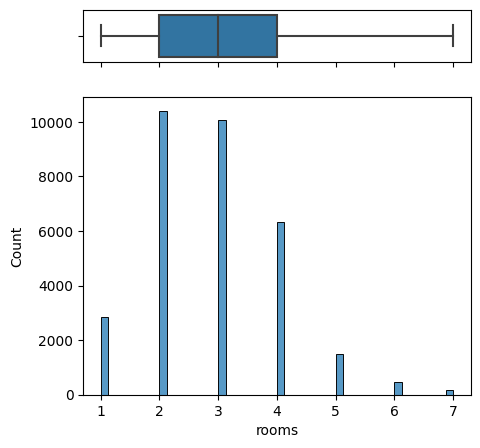

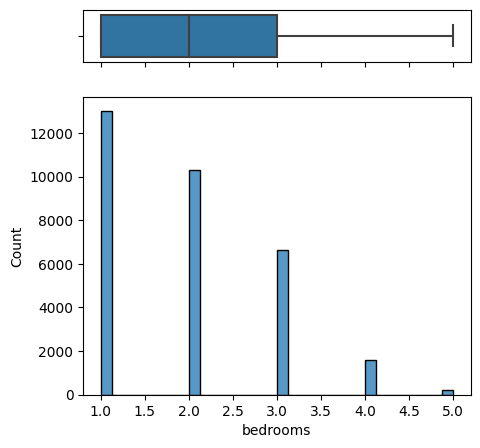

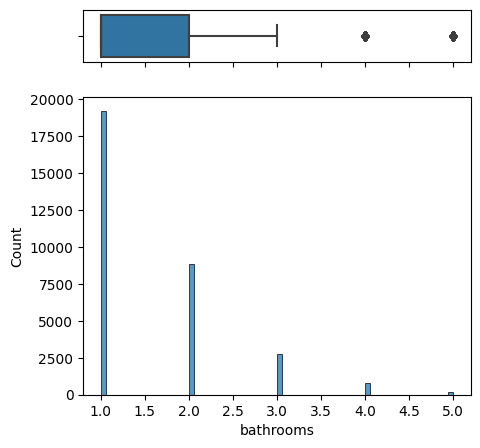

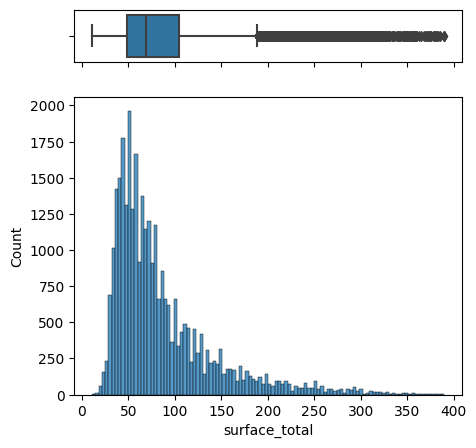

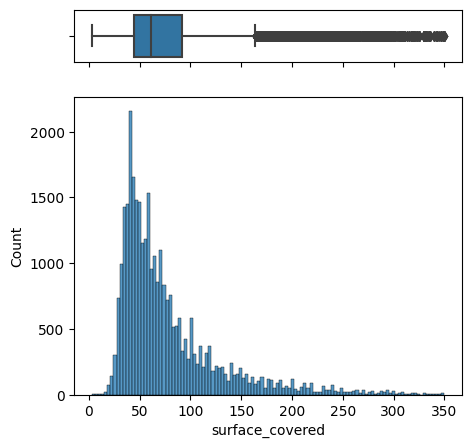

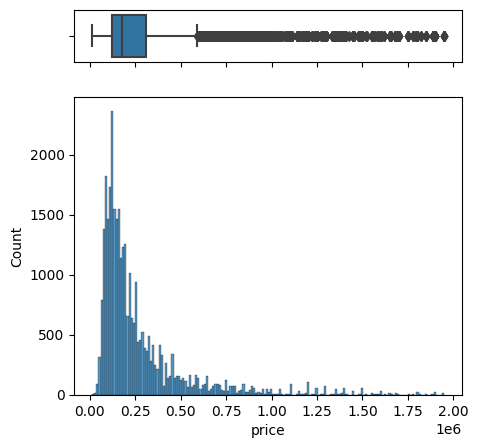

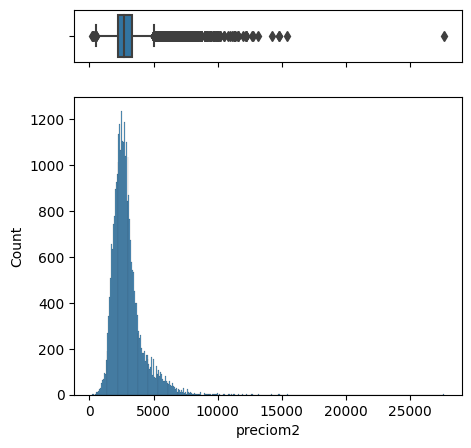

In [ ]:
for column in numeric_cols:
 # plt.figure(figsize=(6, 6))
  histo_boxplot(regresion_f, column)
  plt.show()

In [ ]:
regresion_f[regresion_f['l3'].isna()]

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,preciom2
442,NaN,4.00,2.00,1.00,147.00,125.00,280000,1904.76
444,NaN,3.00,2.00,1.00,54.00,45.00,175000,3240.74
467,NaN,6.00,3.00,2.00,178.00,163.00,590000,3314.61
1387,NaN,2.00,1.00,1.00,29.00,29.00,38000,1310.34
1391,NaN,3.00,1.00,1.00,37.00,37.00,52000,1405.41
...,...,...,...,...,...,...,...,...
30376,NaN,2.00,1.00,1.00,36.00,36.00,75000,2083.33
30664,NaN,5.00,3.00,2.00,130.00,130.00,40000,307.69
30979,NaN,4.00,3.00,3.00,170.00,240.00,620000,3647.06
31280,NaN,3.00,2.00,2.00,87.00,87.00,120000,1379.31


In [ ]:
precio_m2 = regresion_f.groupby(['l3'])['preciom2'].agg(['mean', np.std]).reset_index().sort_values('mean', ascending=False).reset_index()
precio_m2

,index,l3,mean,std
0,34,Puerto Madero,5835.69,1501.05
1,26,Palermo,3492.68,1131.69
2,19,Las Cañitas,3489.28,783.56
3,6,Belgrano,3279.41,1056.42
4,24,Nuñez,3187.65,932.41
5,35,Recoleta,3124.72,841.17
6,5,Barrio Norte,2940.58,857.13
7,36,Retiro,2843.16,820.59
8,14,Colegiales,2817.78,554.44
9,55,Villa Urquiza,2688.35,650.36


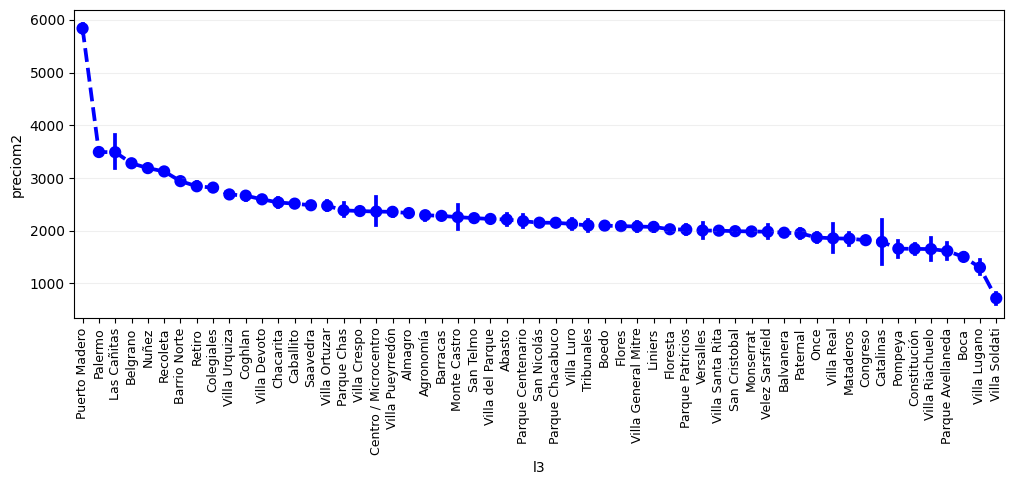

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.pointplot(x="l3",
                   y="preciom2",
                   data=regresion_f,
                   linestyles=["--"],
                   color = "blue",
                   order= regresion_f.groupby(["l3"]).mean()[["preciom2"]].sort_values("preciom2", ascending= False).index)
plt.xticks(rotation=90, size=9)
plt.grid(axis="y",  alpha=0.2)

### Imputar NAs en Barrio

In [ ]:
# Función para obtener el barrio más cercano basado en el precio_m2
def get_nearest_barrio(precio):
    differences = abs(precio_m2['mean'] - precio)
    index_of_min = differences.idxmin()
    return precio_m2.loc[index_of_min, 'l3']


In [ ]:
# Aplicar la función a las filas con valores NaN en la columna 'Barrio' de df2
regresion_f['l3'] = regresion_f.apply(lambda row: get_nearest_barrio(row['preciom2']) if pd.isna(row['l3']) else row['l3'], axis=1)


In [ ]:
regresion_f[regresion_f['l3'].isna()]

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,preciom2


## Dataset 1 - y=precio por metro cuadrado

In [ ]:
df1 = regresion_f.drop(['surface_total', 'surface_covered', 'price'],axis=1)
df1

,l3,rooms,bedrooms,bathrooms,preciom2
0,Belgrano,6.00,4.00,2.00,2894.74
1,Puerto Madero,3.00,2.00,3.00,9937.89
2,Palermo,2.00,1.00,1.00,3473.68
3,Palermo,3.00,2.00,1.00,3062.50
4,Villa del Parque,1.00,1.00,1.00,1954.55
...,...,...,...,...,...
31734,Villa Crespo,2.00,1.00,1.00,2482.76
31735,Monte Castro,2.00,1.00,1.00,2053.57
31736,Colegiales,2.00,1.00,1.00,2200.00
31737,Colegiales,1.00,1.00,1.00,1779.66


In [ ]:
df1 = pd.get_dummies(df1, columns=['l3'],drop_first=True)
df1

,rooms,bedrooms,bathrooms,preciom2,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
0,6.00,4.00,2.00,2894.74,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.00,2.00,3.00,9937.89,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.00,1.00,1.00,3473.68,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.00,2.00,1.00,3062.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.00,1.00,1.00,1954.55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31734,2.00,1.00,1.00,2482.76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31735,2.00,1.00,1.00,2053.57,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31736,2.00,1.00,1.00,2200.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31737,1.00,1.00,1.00,1779.66,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Escalando las columnas numéricas
scaled_columns = ['rooms', 'bedrooms', 'bathrooms']
scaler = StandardScaler()
df1[scaled_columns] = scaler.fit_transform(df1[scaled_columns])

In [ ]:
df1

,rooms,bedrooms,bathrooms,preciom2,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
0,2.81,2.22,0.57,2894.74,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.13,0.08,1.82,9937.89,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.76,-0.98,-0.69,3473.68,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.13,0.08,-0.69,3062.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.65,-0.98,-0.69,1954.55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31734,-0.76,-0.98,-0.69,2482.76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31735,-0.76,-0.98,-0.69,2053.57,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31736,-0.76,-0.98,-0.69,2200.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31737,-1.65,-0.98,-0.69,1779.66,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Generación del modelo de regresión**

### Funcion para evaluacion de modelos

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
def model_ev(X_train, X_test, y_train, y_test, model):

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Métricas
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    adjusted_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    adjusted_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    # Impresión de resultados
    print(f'RMSE Train: {rmse_train}\nRMSE Test: {rmse_test}\n')
    print(f'MAE Train: {mae_train}\nMAE Test: {mae_test}\n')
    print(f"R^2(train)= {r2_train}\nR^2_ajt(train)= {adjusted_r2_train}\n")
    print(f"R^2(test)= {r2_test}\nR^2_ajt(test)= {adjusted_r2_test}\n")

    # Gráficos
    plt.figure(figsize = (12,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(y_test, y_test_pred, s =2)

    return {
        'MAE TRAIN': mae_train,
        'MAE TEST': mae_test,
        'R^2_ajt(train)': adjusted_r2_train,
        'R^2_ajt(test)': adjusted_r2_test
    }


## Modelo 1 Prediccion: Precio por Metro Cuadrado

In [ ]:
df1.head()

,rooms,bedrooms,bathrooms,preciom2,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
0,2.81,2.22,0.57,2894.74,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.13,0.08,1.82,9937.89,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.76,-0.98,-0.69,3473.68,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.13,0.08,-0.69,3062.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.65,-0.98,-0.69,1954.55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = df1.drop(['preciom2'], axis=1)
y = df1['preciom2']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lreg = LinearRegression()
model_lr1 = lreg.fit(X_train, y_train)

In [ ]:
import warnings
warnings.filterwarnings('ignore')


RMSE Train: 847.0783828893163
RMSE Test: 817.5453042784196

MAE Train: 587.8269780329881
MAE Test: 582.136733967135

R^2(train)= 0.4882468531545343
R^2_ajt(train)= 0.48688414901300425

R^2(test)= 0.5006121689801122
R^2_ajt(test)= 0.4974982520460418



{'MAE TRAIN': 587.8269780329881,
 'MAE TEST': 582.136733967135,
 'R^2_ajt(train)': 0.48688414901300425,
 'R^2_ajt(test)': 0.4974982520460418}

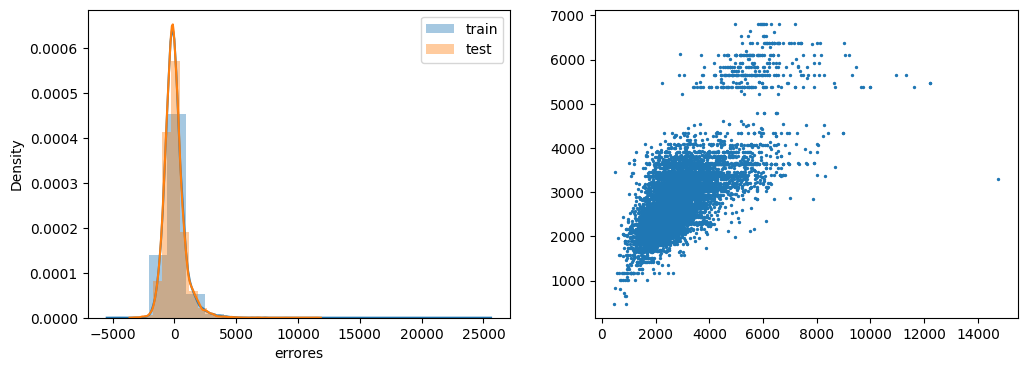

In [ ]:
model_ev(X_train,X_test,y_train,y_test,model_lr1)

In [ ]:
import statsmodels.api as sm

In [ ]:
results = sm.OLS(y, X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               preciom2   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                              6941.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):                        0.00
Time:                        18:10:23   Log-Likelihood:                     -2.5892e+05
No. Observations:               31739   AIC:                                  5.180e+05
Df Residuals:                   31680   BIC:                                  5.184e+05
Df Model:                          59                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

## Modelo 2 Prediccion: Precio

In [ ]:
df2 = regresion_f.drop(['preciom2'], axis=1)

In [ ]:
df2

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Belgrano,6.00,4.00,2.00,190.00,178.00,550000
1,Puerto Madero,3.00,2.00,3.00,161.00,149.00,1600000
2,Palermo,2.00,1.00,1.00,38.00,38.00,132000
3,Palermo,3.00,2.00,1.00,80.00,75.00,245000
4,Villa del Parque,1.00,1.00,1.00,44.00,41.00,86000
...,...,...,...,...,...,...,...
31734,Villa Crespo,2.00,1.00,1.00,29.00,29.00,72000
31735,Monte Castro,2.00,1.00,1.00,56.00,54.00,115000
31736,Colegiales,2.00,1.00,1.00,45.00,40.00,99000
31737,Colegiales,1.00,1.00,1.00,59.00,59.00,105000


In [ ]:
# Escalando las columnas numéricas
scaled_columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']
scaler = StandardScaler()
df2[scaled_columns] = scaler.fit_transform(df2[scaled_columns])

In [ ]:
df2 = pd.get_dummies(df2, columns=['l3'],drop_first=True)
df2

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
0,2.81,2.22,0.57,1.87,1.99,550000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.13,0.08,1.82,1.35,1.41,1600000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.76,-0.98,-0.69,-0.87,-0.78,132000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.13,0.08,-0.69,-0.11,-0.05,245000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.65,-0.98,-0.69,-0.76,-0.72,86000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31734,-0.76,-0.98,-0.69,-1.03,-0.96,72000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31735,-0.76,-0.98,-0.69,-0.54,-0.47,115000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31736,-0.76,-0.98,-0.69,-0.74,-0.74,99000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31737,-1.65,-0.98,-0.69,-0.49,-0.37,105000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df2.drop(['price'], axis=1)
y = df2['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
lreg = LinearRegression()
model_lr2 = lreg.fit(X_train, y_train)

RMSE Train: 111578.22262518606
RMSE Test: 107807.17692256643

MAE Train: 65857.33305014475
MAE Test: 65340.3052124102

R^2(train)= 0.8184282685329416
R^2_ajt(train)= 0.8179283418518543

R^2(test)= 0.8227021278733151
R^2_ajt(test)= 0.8215588752094961



{'MAE TRAIN': 65857.33305014475,
 'MAE TEST': 65340.3052124102,
 'R^2_ajt(train)': 0.8179283418518543,
 'R^2_ajt(test)': 0.8215588752094961}

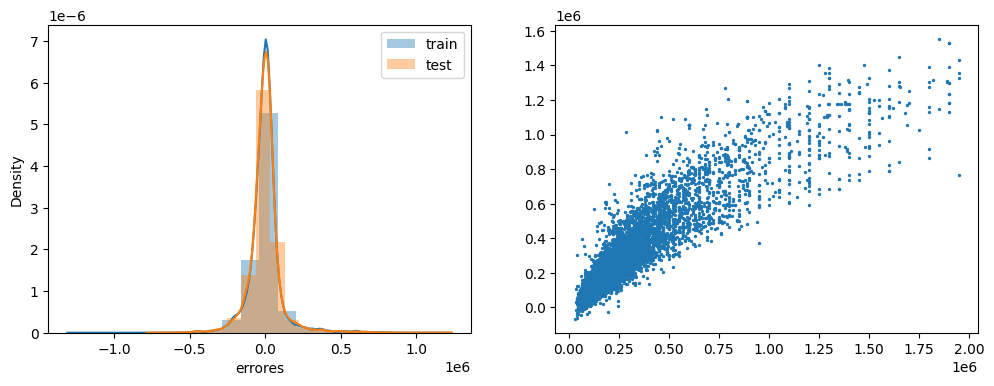

In [ ]:
model_ev(X_train,X_test,y_train,y_test,model_lr2)

In [ ]:
results = sm.OLS(y, X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              5395.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):                        0.00
Time:                        15:36:48   Log-Likelihood:                     -4.1373e+05
No. Observations:               31739   AIC:                                  8.276e+05
Df Residuals:                   31678   BIC:                                  8.281e+05
Df Model:                          61                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

## Modelo 3 Prediccion: Precio (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

RMSE Train: 37770.70621918801
RMSE Test: 81885.44500062005

MAE Train: 20565.622151633965
MAE Test: 43657.83741717777

R^2(train)= 0.9791934743033353
R^2_ajt(train)= 0.9791361870964972

R^2(test)= 0.8977127263380476
R^2_ajt(test)= 0.8970531572372675



{'MAE TRAIN': 20565.622151633965,
 'MAE TEST': 43657.83741717777,
 'R^2_ajt(train)': 0.9791361870964972,
 'R^2_ajt(test)': 0.8970531572372675}

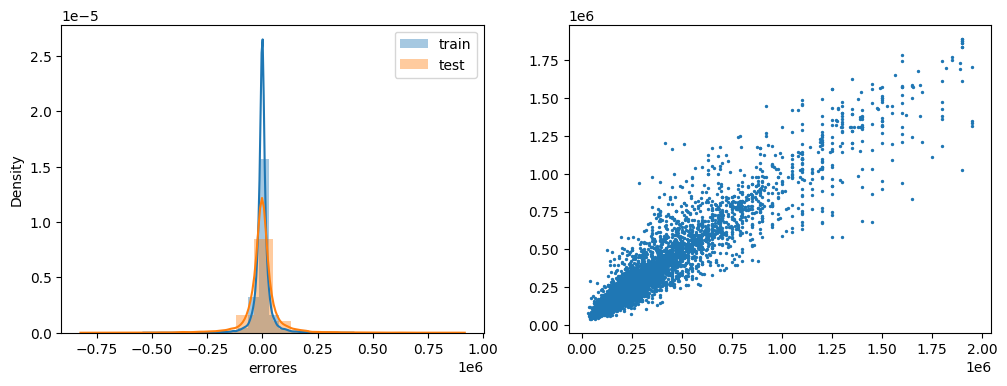

In [ ]:
model_ev(X_train,X_test,y_train,y_test,rf)

## Modelo 4 Prediccion: Precio (Random Forest - Optimizacion HiperParametros).

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [100, 150]
max_features = np.arange(5,15)
max_depth = np.arange(5,15)


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               }
print(random_grid)

{'n_estimators': [100, 150], 'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 10,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               scoring    = 'neg_root_mean_squared_error',
                               return_train_score = True,
                               n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': [100, 150]},
                   random_state=42, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 100, 'max_features': 12, 'max_depth': 13}

In [ ]:
rf_op = RandomForestRegressor(n_estimators=100,
                           max_depth=12,
                           max_features=13)
rf_op.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, max_features=13)

RMSE Train: 77165.37480298127
RMSE Test: 89453.7619516349

MAE Train: 46547.756666330264
MAE Test: 52029.41592129881

R^2(train)= 0.9131571041812458
R^2_ajt(train)= 0.9129179971334036

R^2(test)= 0.8779309976978844
R^2_ajt(test)= 0.8771438719959364



{'MAE TRAIN': 46547.756666330264,
 'MAE TEST': 52029.41592129881,
 'R^2_ajt(train)': 0.9129179971334036,
 'R^2_ajt(test)': 0.8771438719959364}

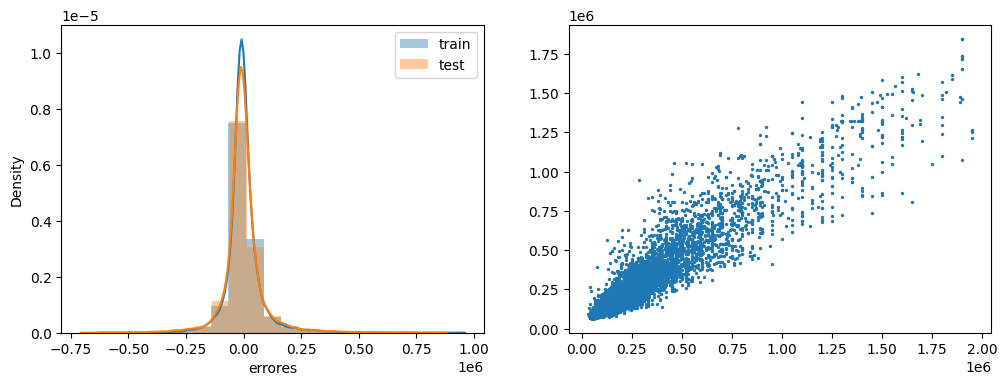

In [ ]:
model_ev(X_train,X_test,y_train,y_test,rf_op)

# **Conclusiones**

Error Absoluto Medio (MAE):

El modelo1 (Regresión Lineal) tiene un MAE en entrenamiento y prueba bastante similar, lo que indica un buen ajuste del modelo sin señales evidentes de sobreajuste. Sin embargo, el error es relativamente alto comparado con los otros modelos.

El modelo2 (RandomForest por defecto) presenta el MAE más bajo en el entrenamiento, lo que indica que se ajusta muy bien a los datos de entrenamiento. No obstante, hay una diferencia notable entre el MAE de entrenamiento y el de prueba, lo cual podría indicar cierto grado de sobreajuste.

El modelo3 (RandomForest con optimización) tiene un MAE de entrenamiento y prueba más equilibrado que el modelo2, aunque ambos valores son más altos que en el modelo2. Esto sugiere que la optimización de hiperparámetros ayudó a reducir el sobreajuste.

R^2 ajustado:

Para el modelo1, el R^2 ajustado en entrenamiento y prueba es alrededor del 82%, lo que indica que el modelo explica aproximadamente el 82% de la variabilidad de la respuesta. Esto es un buen valor, pero es superado por los otros modelos.

El modelo2 tiene el R^2 ajustado más alto en el conjunto de entrenamiento (~97.9%), pero cae al 89.7% en el conjunto de prueba. Nuevamente, la diferencia entre estos valores puede ser indicativa de sobreajuste.

El modelo3 presenta un R^2 ajustado ligeramente más bajo en comparación con el modelo2 para ambos conjuntos, pero la diferencia entre entrenamiento y prueba es menor, lo que sugiere un mejor equilibrio general.


Conclusión:

Si bien el modelo2 tiene las métricas más impresionantes en el conjunto de entrenamiento, su desempeño en el conjunto de prueba sugiere un potencial sobreajuste.
El modelo3, después de la optimización de hiperparámetros, parece ofrecer un equilibrio más robusto entre el rendimiento en los conjuntos de entrenamiento y prueba, aunque con métricas ligeramente inferiores al modelo2.
El modelo1 (Regresión Lineal) es superado por los modelos basados en RandomForest en términos de todas las métricas presentadas.
En función de los objetivos y el contexto específico, podríamos considerar usar el modelo3 por su balance general. Sin embargo, es esencial validar estos modelos con datos nuevos y considerar otros aspectos prácticos antes de hacer una elección definitiva.